In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import cv2
import time

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
import torchvision.models as models
from tqdm import tqdm_notebook

dataset_root = "./data/fashion_pt" 
Dataset = FashionMNIST

## Data

In [2]:
# Prepare data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = Dataset(dataset_root, download=True, train=True, transform=transform)
testset = Dataset(dataset_root, download=True, train=False, transform=transform)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)

In [3]:
# Create data loaders

batch_size = 64

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

Class: Trouser
Shape: (1, 28, 28)
Class: Trouser
Shape: (1, 28, 28)


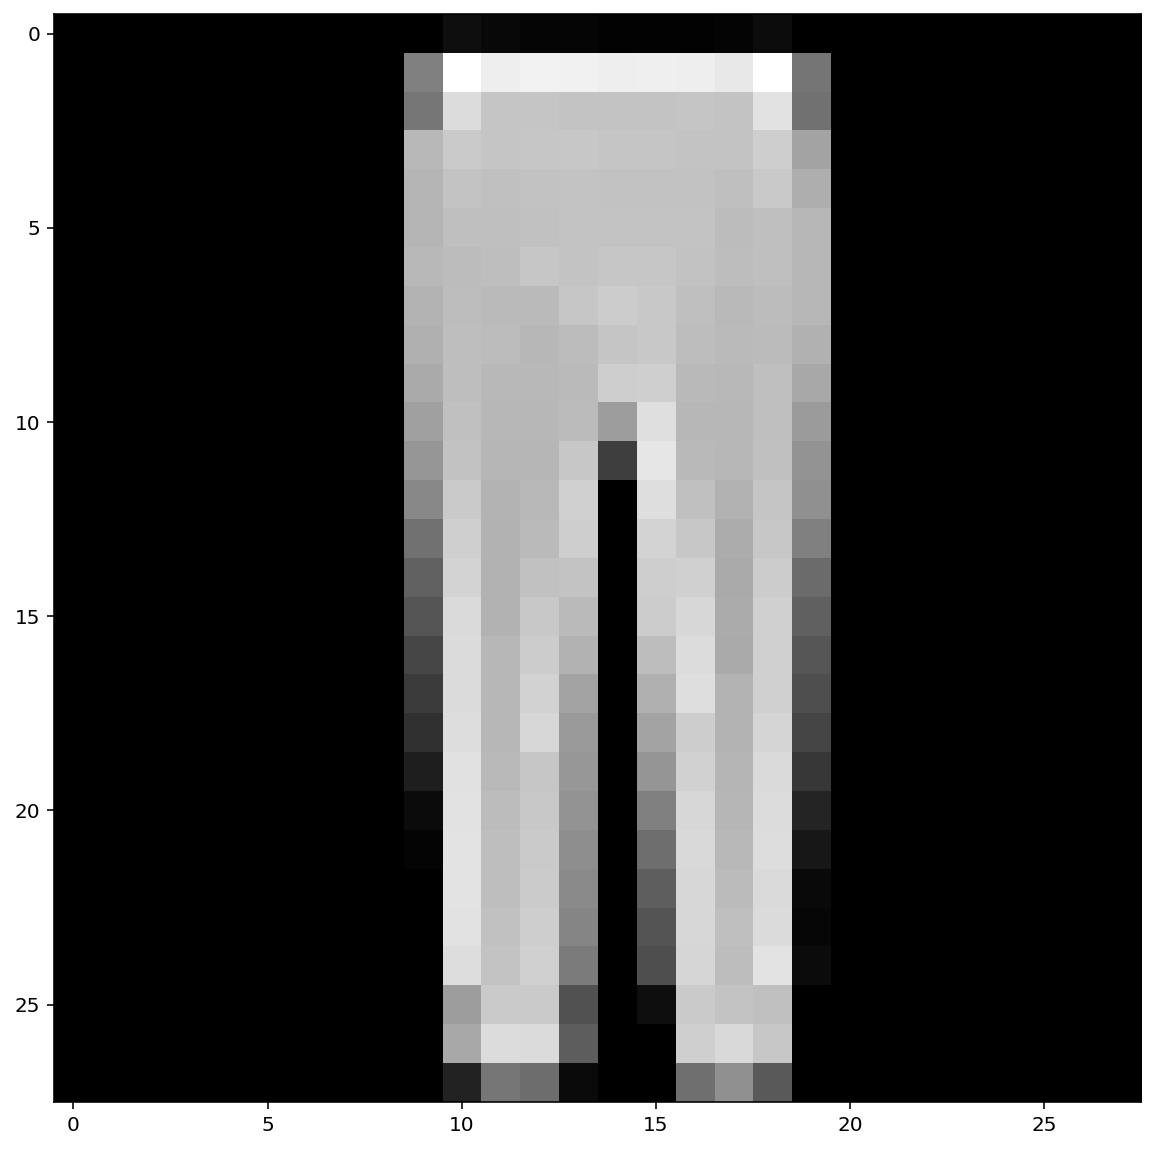

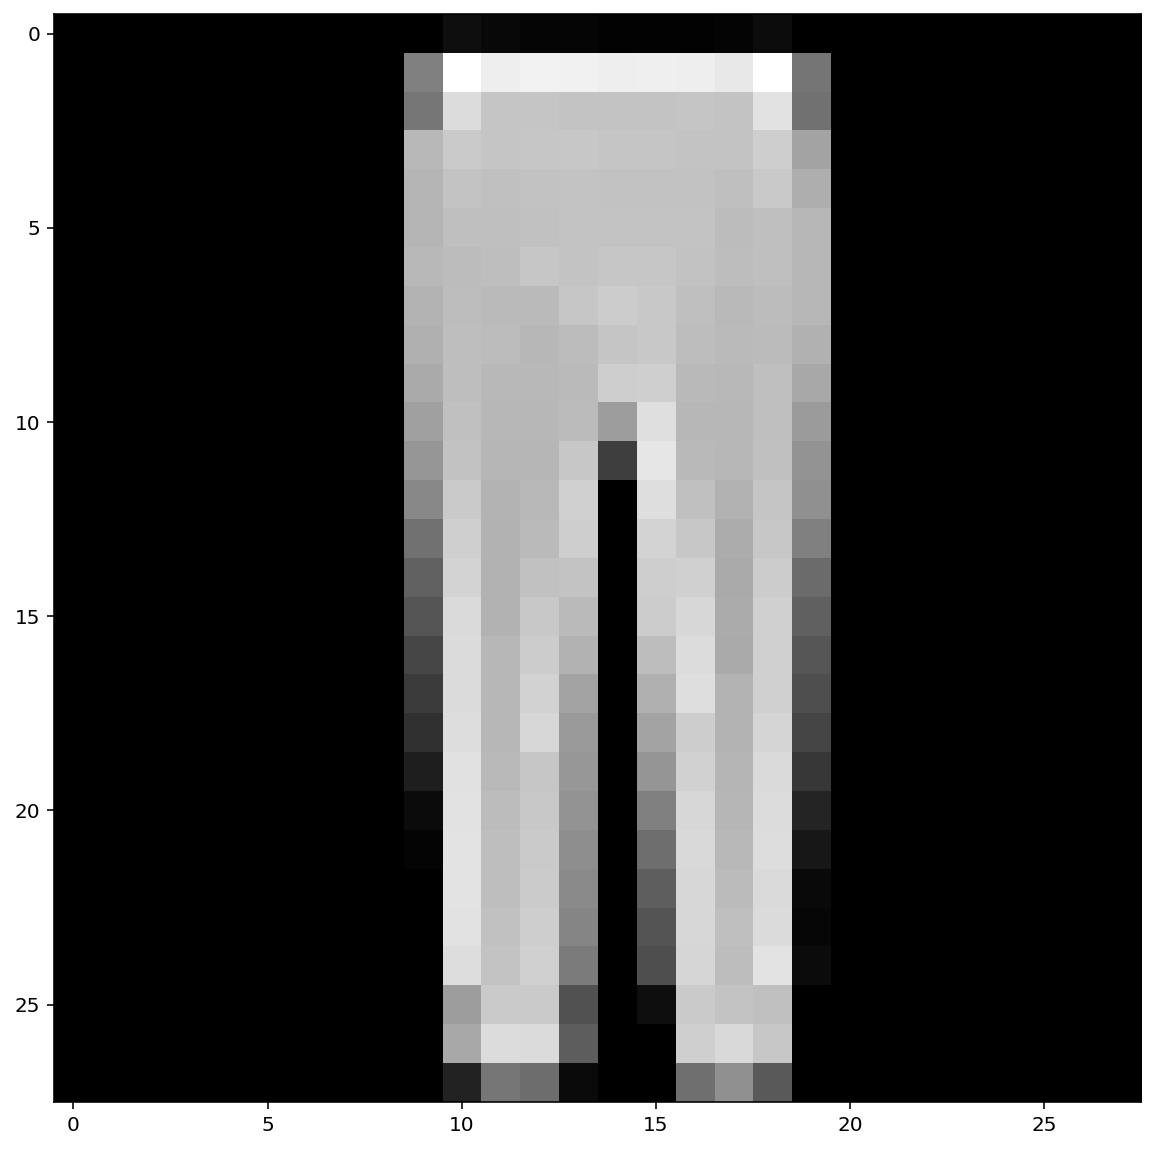

In [4]:
# Show random image shape using iterator

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

idx = np.random.choice(batch_size)
plt.imshow(np.squeeze(images[idx]), cmap='gray')
print('Class: ' + str(classes[labels[idx]]))
print('Shape: ' + str(images[idx].shape))

In [5]:
upsampler_up = torch.nn.Upsample(size=32, mode='bilinear')
def to_3_channels(one_channel_img):
    return np.vstack((one_channel_img, one_channel_img, one_channel_img))
    

colorimage = to_3_channels(images[idx])
print(images[idx].shape)
print(colorimage.shape)

(1, 28, 28)
(3, 28, 28)
(1, 28, 28)
(3, 28, 28)


In [6]:
def to_3_channels_batch(one_channel_img_batch):
    return np.hstack((one_channel_img_batch, one_channel_img_batch,one_channel_img_batch))

In [7]:
upsampler_up = torch.nn.Upsample(size=32, mode='bilinear')

def to_3_channels_tensor_batch(one_channel_tensor_batch):
    batch = torch.squeeze(torch.stack([one_channel_tensor_batch, one_channel_tensor_batch, one_channel_tensor_batch], dim=1))
    return upsampler_up(batch)

batch = next(iter(test_loader))
print(batch[0].size())
batch_3_channels = to_3_channels_batch(batch[0])
print(torch.from_numpy(batch_3_channels).size())

torch.Size([64, 1, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 3, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

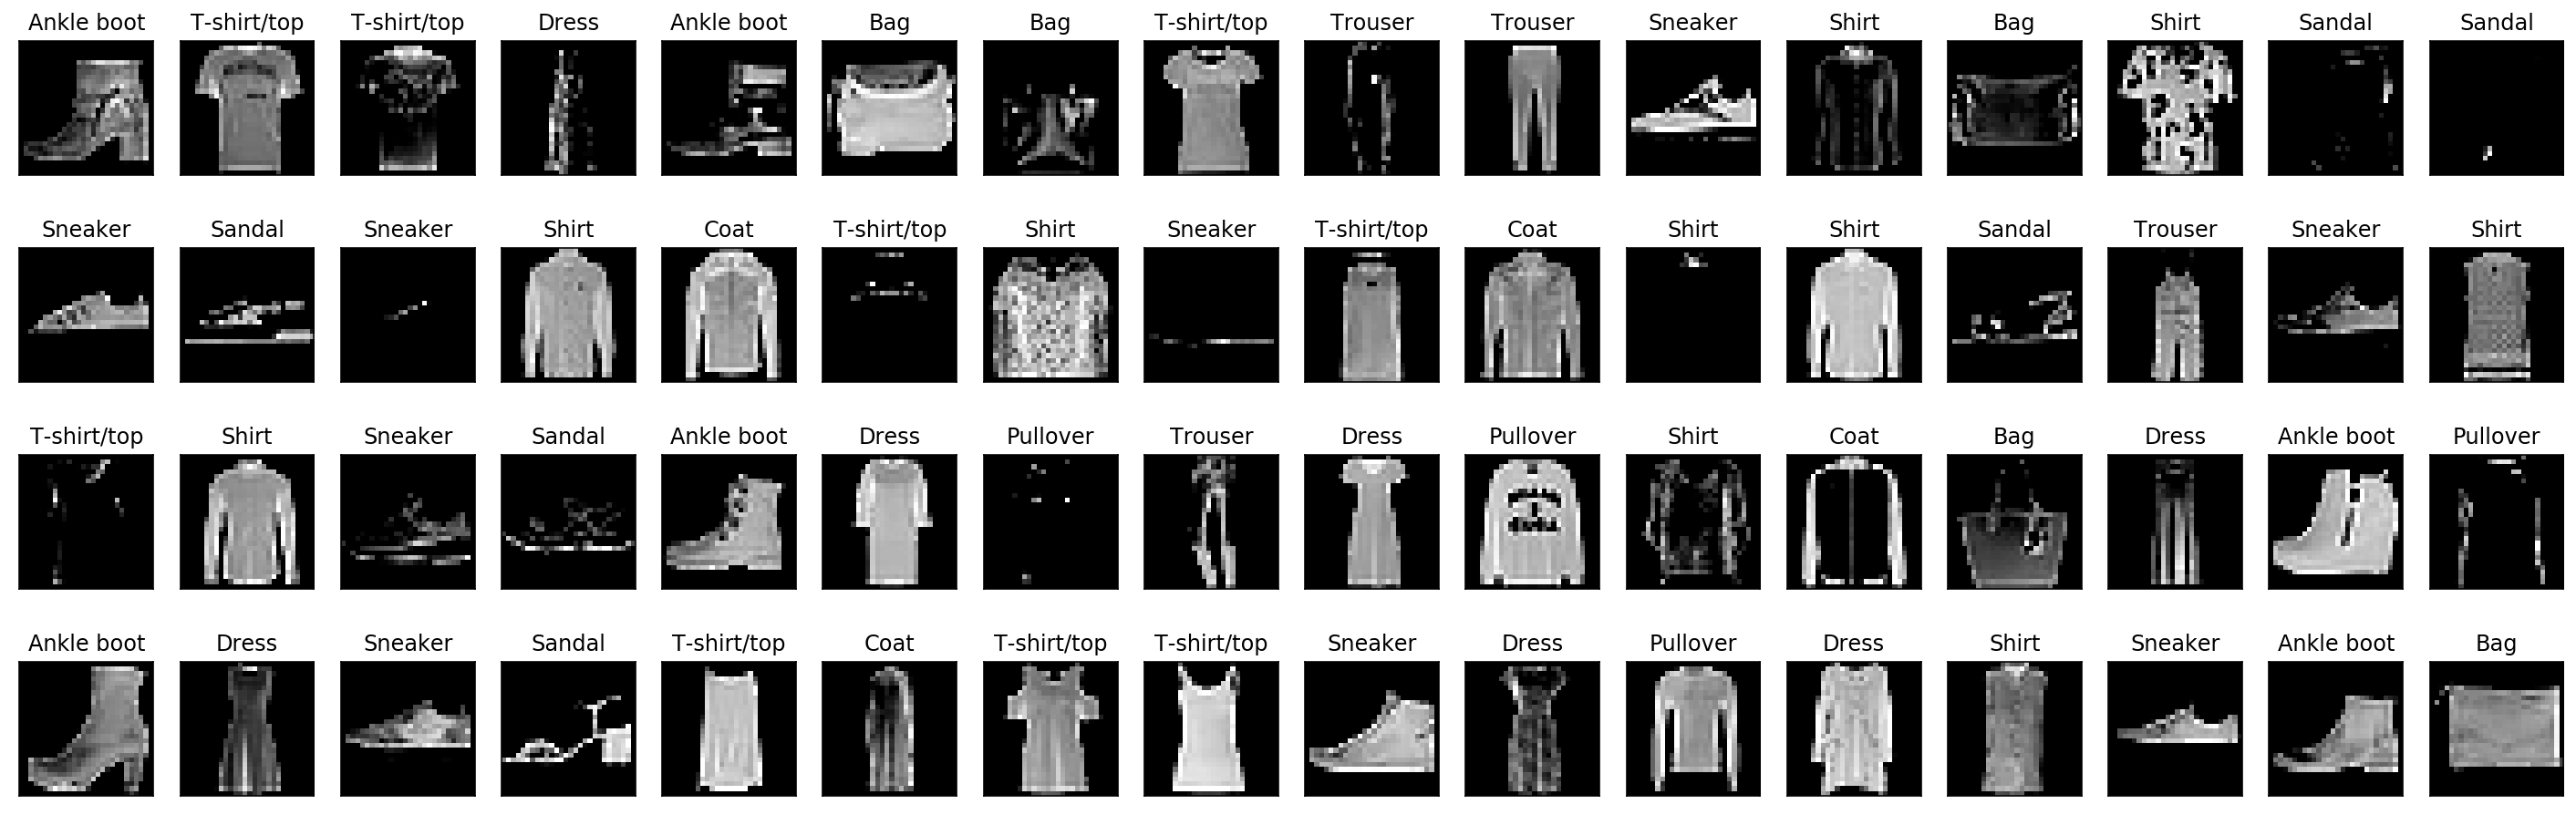

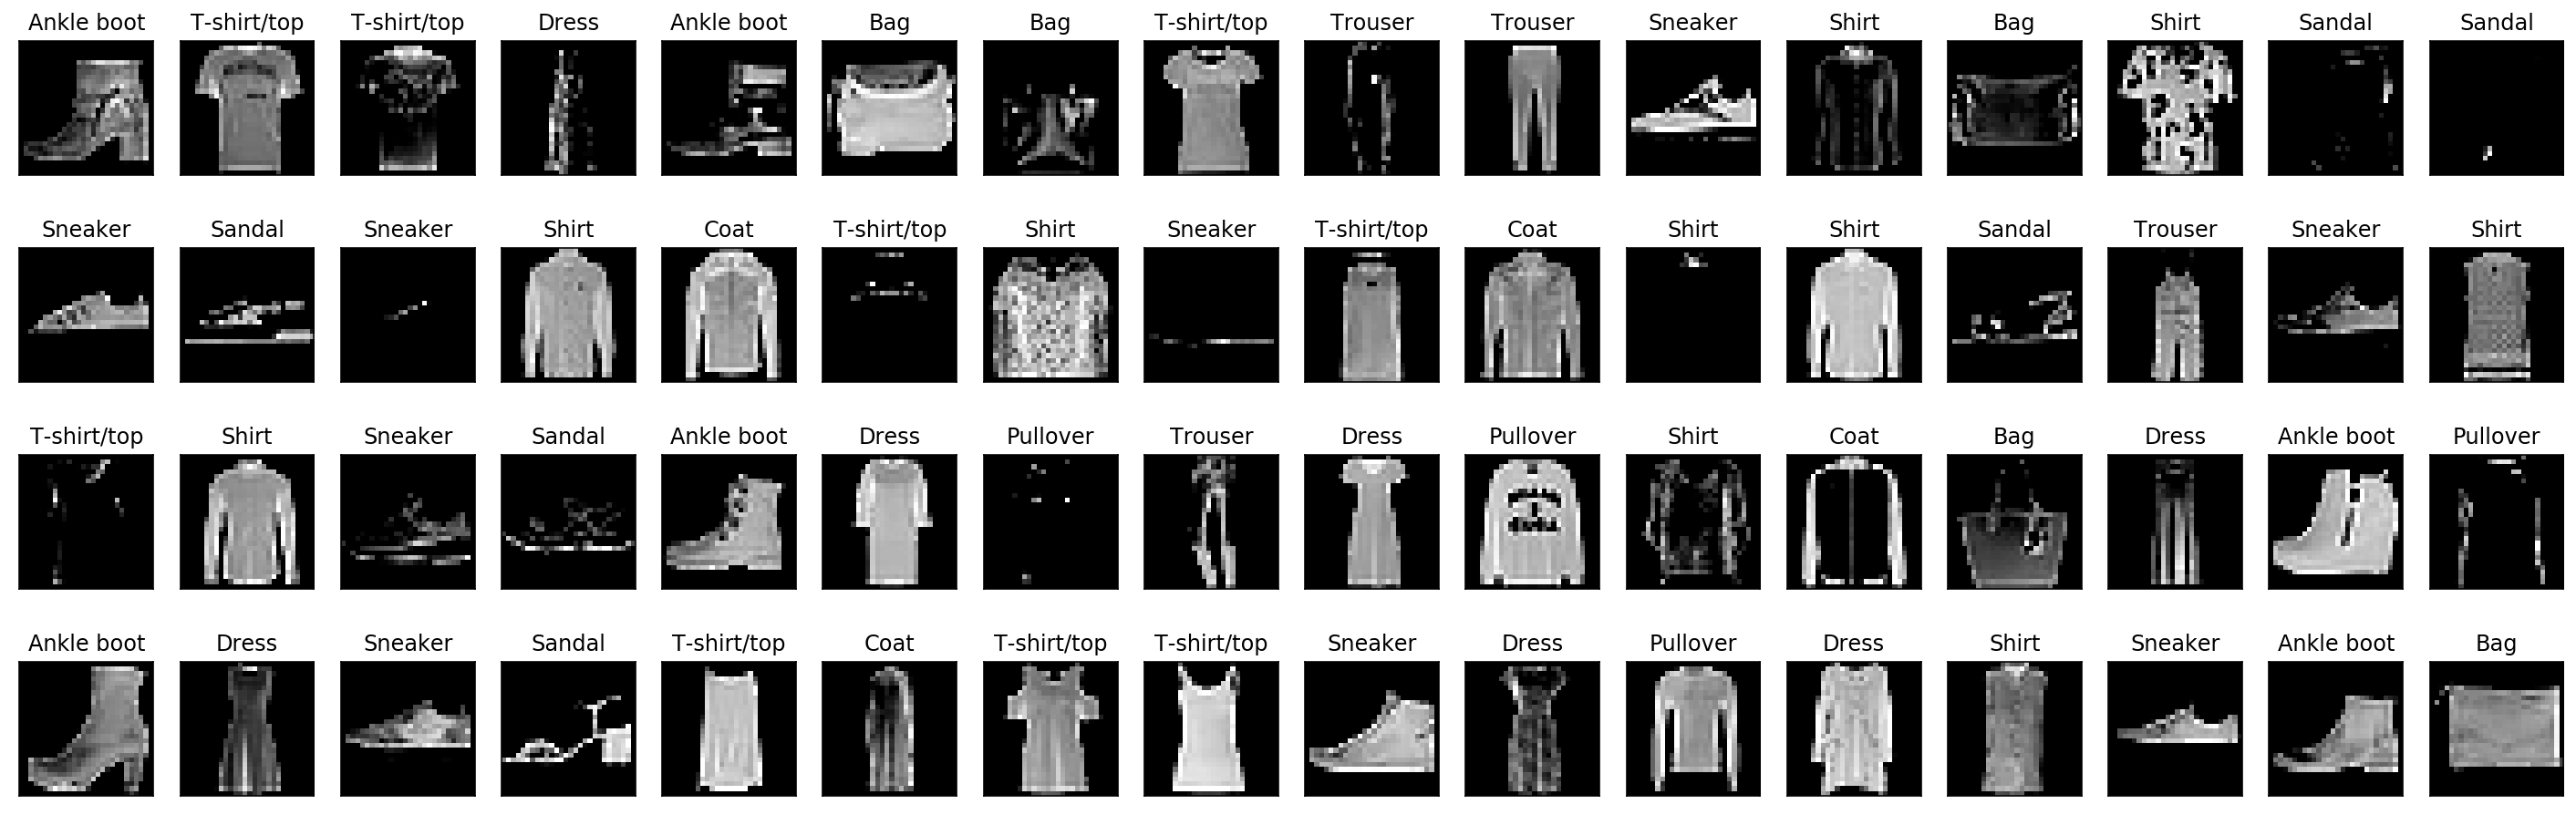

In [8]:
# Show full batch size

fig = plt.figure(figsize=(25, 8))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(4, batch_size/4, idx+1, xticks=[], yticks=[])
    ax.imshow(np.moveaxis(to_3_channels(images[idx]), 0, -1))
    ax.set_title(classes[labels[idx]])

In [9]:
# instantiate and print your pretrained network
net = models.vgg11(pretrained = True)
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [10]:
classifier_childs = list(net.classifier.children())
print(classifier_childs)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=1000, bias=True)]
[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=1000, bias=True)]


In [11]:
classifier_childs.pop()
print(classifier_childs)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False)]
[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False)]


In [12]:
classifier_childs.append(torch.nn.Linear(4096, num_classes))
print(classifier_childs)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]
[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [13]:
new_classifier = torch.nn.Sequential(*classifier_childs)
print(new_classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


In [14]:
net.classifier = new_classifier

In [15]:
# Define learning rate, loss function and optimizer

learning_rate = 0.0001

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [16]:
# Calculate accuracy before training
correct = 0
total = 0
net.eval()
for images, labels in tqdm_notebook(test_loader):

    outputs = net(to_3_channels_tensor_batch(images))
    
    _, predicted = torch.max(outputs.data, 1) # output -> value, index

    total += labels.size(0)
    correct += (predicted == labels).sum()

accuracy = 100.0 * correct.item() / total

accuracy

/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


8.57

8.57

In [17]:
# Freeze all layers

for param in net.parameters():
    param.requires_grad = False

In [18]:
# Unfreeze last linear layer

net.classifier[-1].weight.requires_grad = True
net.classifier[-1].bias.requires_grad = True

In [19]:
# Train loop

print_every = 100

def train(n_epochs):
    net.train()
    loss_over_time = [] # to track the loss as the network trains
    start_time = time.time()
    for epoch in tqdm_notebook(range(n_epochs)):  # loop over the dataset multiple times
        
        running_loss = 0.0
        
        for batch_i, data in enumerate(tqdm_notebook(train_loader)):
            # get the input images and their corresponding labels
            inputs, labels = data

            # zero the parameter (weight) gradients
            optimizer.zero_grad()

            # forward pass to get outputs
            outputs = net(to_3_channels_tensor_batch(inputs))

            # calculate the loss
            loss = criterion(outputs, labels)

            # backward pass to calculate the parameter gradients
            loss.backward()

            # update the parameters
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to running_loss, we use .item()
            running_loss += loss.item()
            
            if batch_i % print_every == print_every//2:    # print every 100 batches (staring from 50)
                avg_loss = running_loss/print_every
                # record and print the avg loss over the 100 batches
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}, Time: {}'.format(epoch + 1, batch_i+1, avg_loss, str(time.time() - start_time)))
                running_loss = 0.0
                start_time = time.time()


    print('Finished Training')
    return loss_over_time


In [20]:
# Train the model

n_epochs = 2 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':
/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


Epoch: 1, Batch: 51, Avg. Loss: 0.9356950867176056, Time: 30.409022092819214
Epoch: 1, Batch: 51, Avg. Loss: 0.9356950867176056, Time: 30.409022092819214
Epoch: 1, Batch: 151, Avg. Loss: 1.125700911283493, Time: 60.372148752212524
Epoch: 1, Batch: 151, Avg. Loss: 1.125700911283493, Time: 60.372148752212524
Epoch: 1, Batch: 251, Avg. Loss: 0.9381251519918442, Time: 49.022438526153564
Epoch: 1, Batch: 251, Avg. Loss: 0.9381251519918442, Time: 49.022438526153564
Epoch: 1, Batch: 351, Avg. Loss: 0.8239750677347183, Time: 67.14460897445679
Epoch: 1, Batch: 351, Avg. Loss: 0.8239750677347183, Time: 67.14460897445679
Epoch: 1, Batch: 451, Avg. Loss: 0.7972306901216507, Time: 63.34635400772095
Epoch: 1, Batch: 451, Avg. Loss: 0.7972306901216507, Time: 63.34635400772095
Epoch: 1, Batch: 551, Avg. Loss: 0.7514363369345665, Time: 60.13720369338989
Epoch: 1, Batch: 551, Avg. Loss: 0.7514363369345665, Time: 60.13720369338989
Epoch: 1, Batch: 651, Avg. Loss: 0.7257778915762901, Time: 59.522929906845

Epoch: 2, Batch: 51, Avg. Loss: 0.34147423088550566, Time: 82.66411256790161
Epoch: 2, Batch: 51, Avg. Loss: 0.34147423088550566, Time: 82.66411256790161
Epoch: 2, Batch: 151, Avg. Loss: 0.6386442232131958, Time: 59.02761888504028
Epoch: 2, Batch: 151, Avg. Loss: 0.6386442232131958, Time: 59.02761888504028
Epoch: 2, Batch: 251, Avg. Loss: 0.6582350438833237, Time: 60.21909046173096
Epoch: 2, Batch: 251, Avg. Loss: 0.6582350438833237, Time: 60.21909046173096
Epoch: 2, Batch: 351, Avg. Loss: 0.6428666251897812, Time: 60.25902581214905
Epoch: 2, Batch: 351, Avg. Loss: 0.6428666251897812, Time: 60.25902581214905
Epoch: 2, Batch: 451, Avg. Loss: 0.6153234374523163, Time: 58.42977499961853
Epoch: 2, Batch: 451, Avg. Loss: 0.6153234374523163, Time: 58.42977499961853
Epoch: 2, Batch: 551, Avg. Loss: 0.6217808240652084, Time: 60.27255725860596
Epoch: 2, Batch: 551, Avg. Loss: 0.6217808240652084, Time: 60.27255725860596
Epoch: 2, Batch: 651, Avg. Loss: 0.6466799214482307, Time: 59.18758273124695

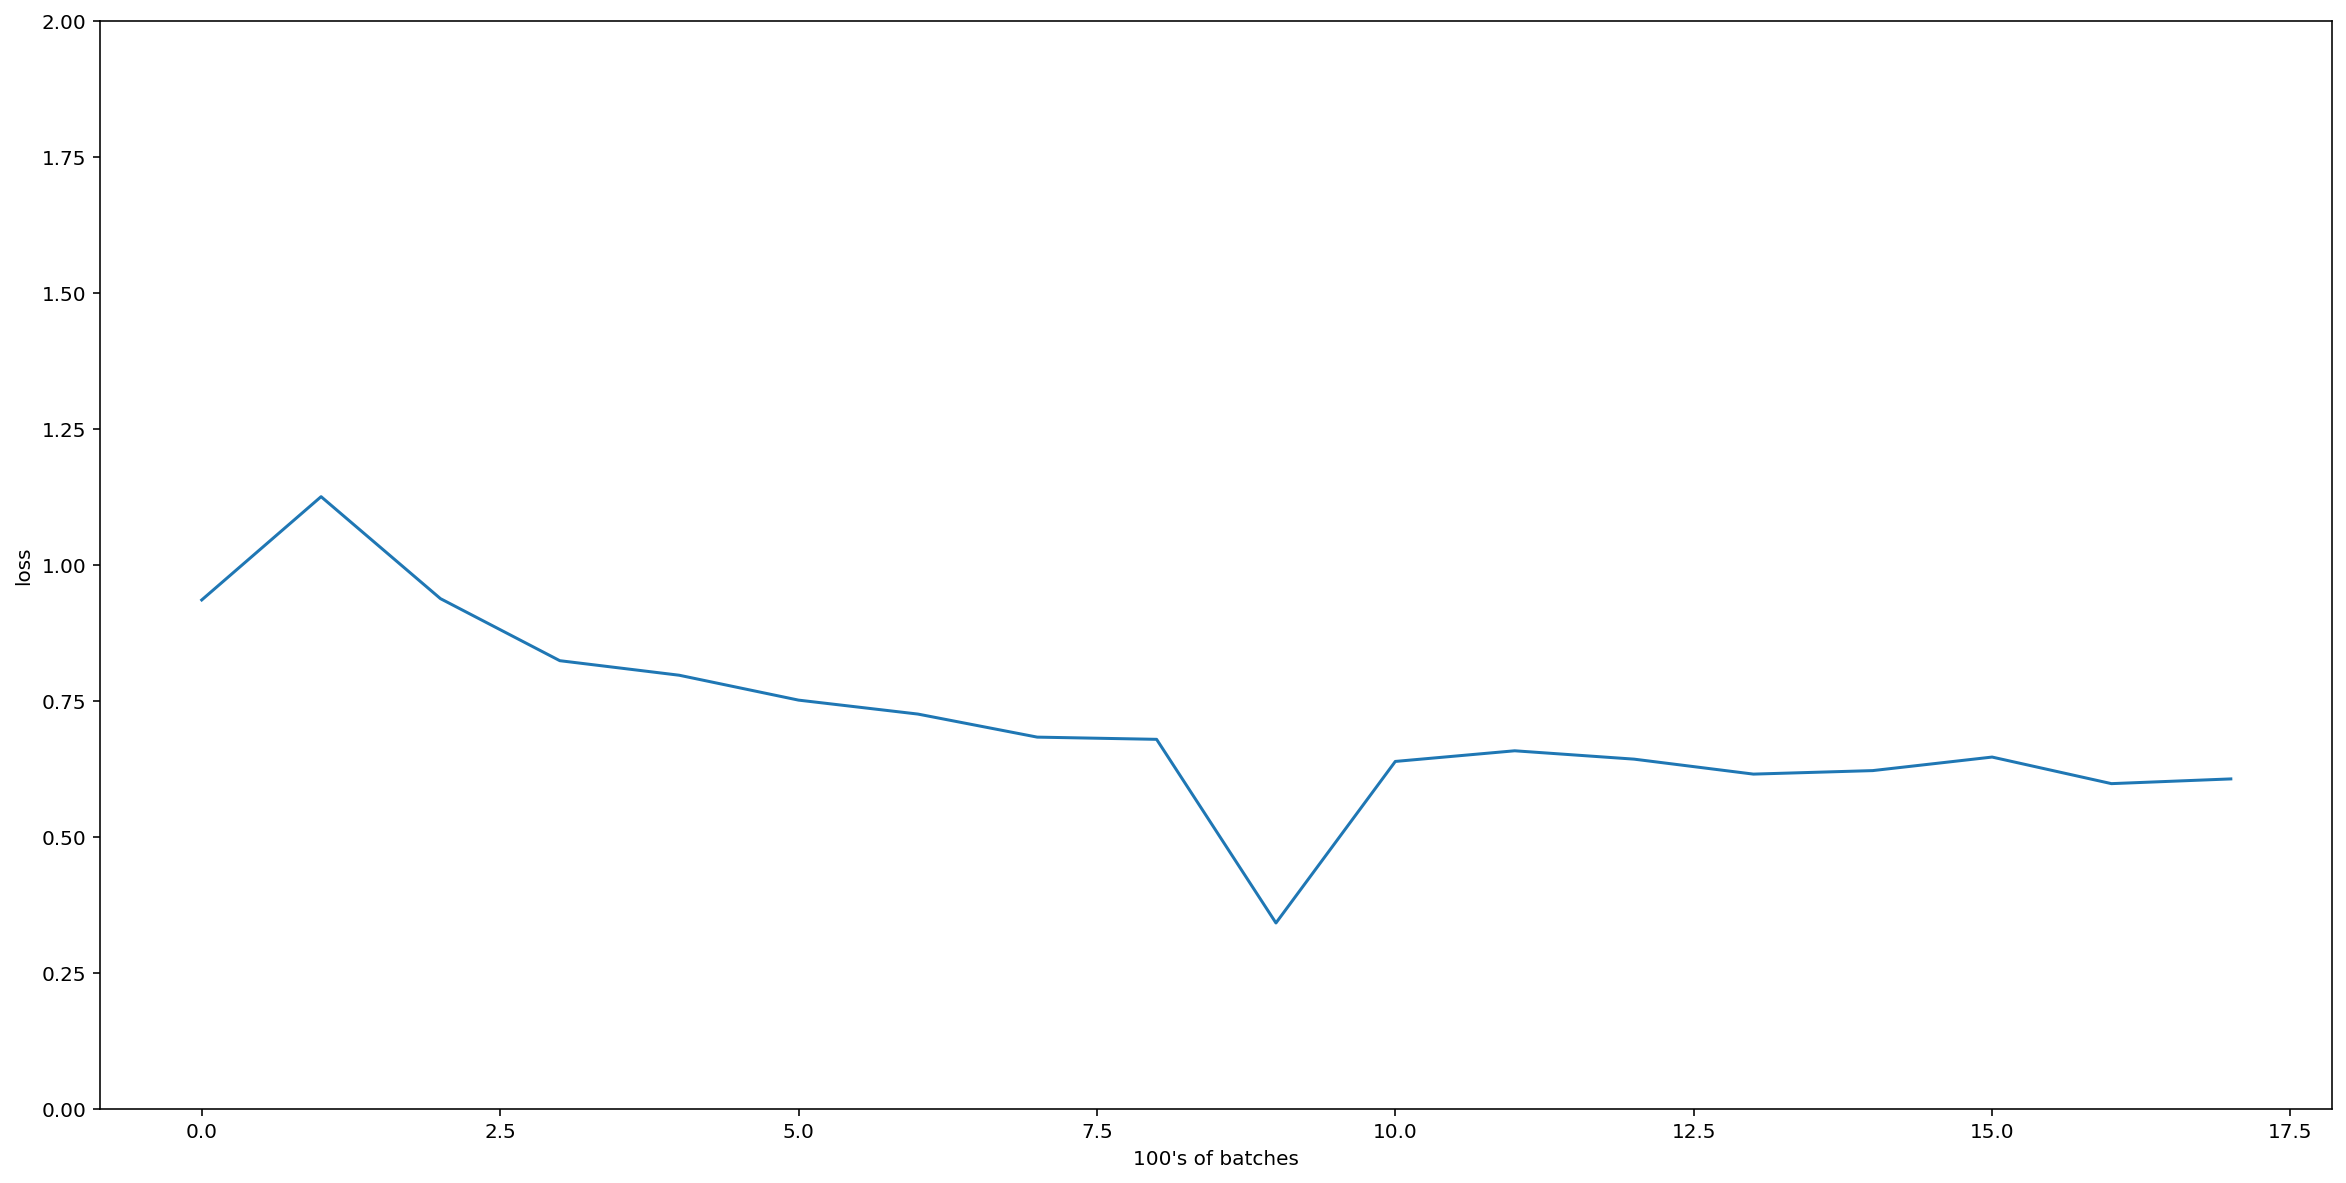

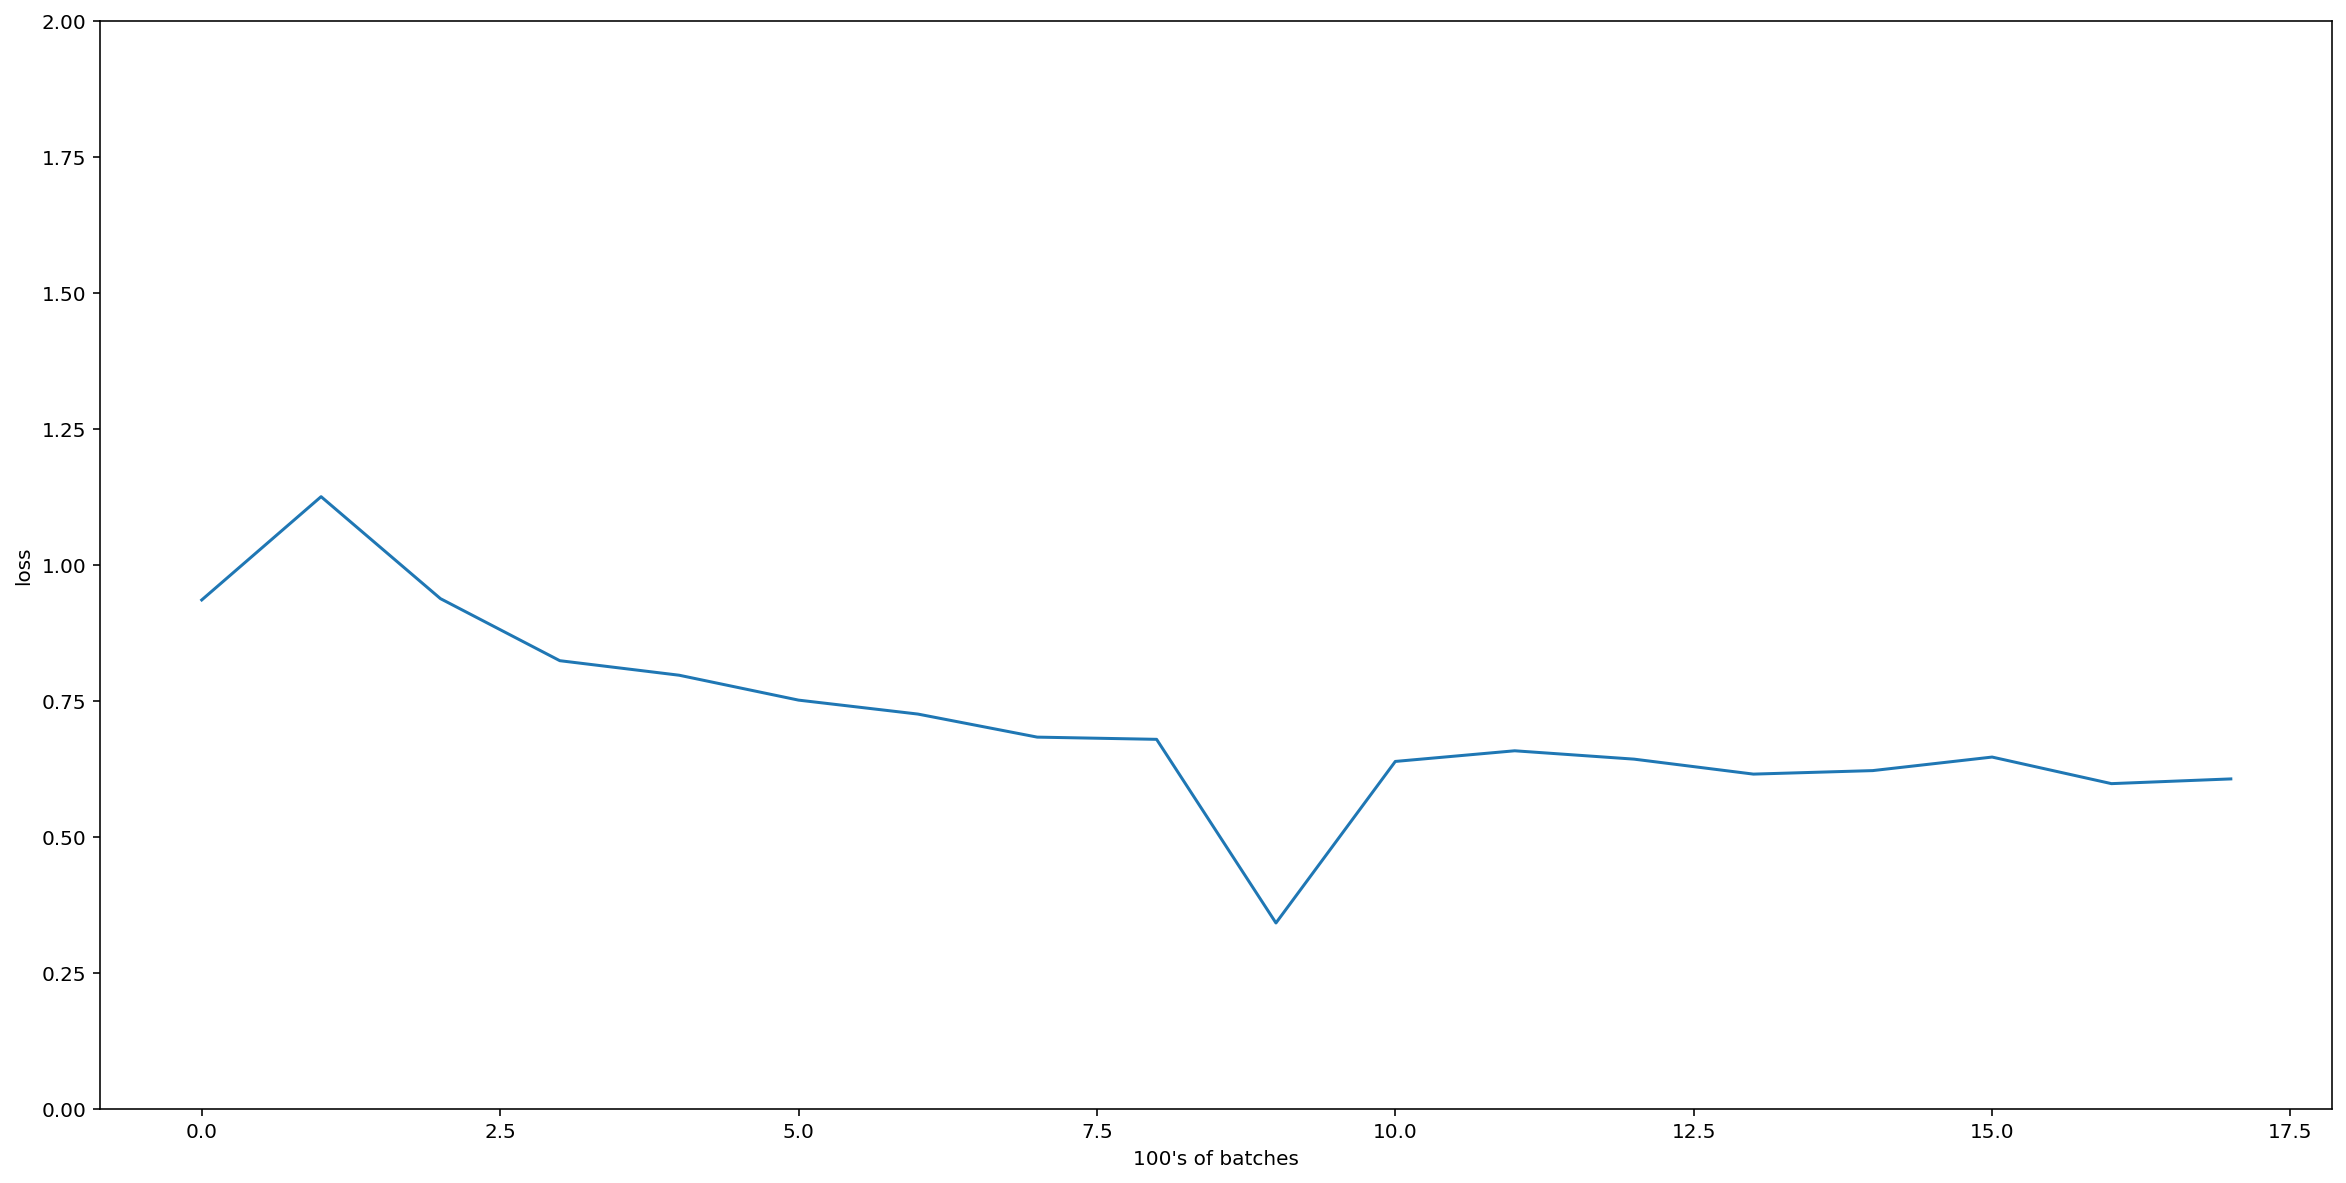

In [21]:
# Show training loss

plt.plot(training_loss)
plt.xlabel('100\'s of batches')
plt.ylabel('loss')
plt.ylim(0, 2.0) # consistent scale
plt.show()

In [22]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



Test Loss: 0.558263

Test Accuracy of T-shirt/top: 93% (42/45)
Test Accuracy of Trouser: 88% (67/76)
Test Accuracy of Pullover: 76% (63/82)
Test Accuracy of Dress: 72% (72/99)
Test Accuracy of  Coat: 78% (55/70)
Test Accuracy of Sandal: 91% (74/81)
Test Accuracy of Shirt: 41% (28/67)
Test Accuracy of Sneaker: 93% (72/77)
Test Accuracy of   Bag: 90% (63/70)
Test Accuracy of Ankle boot: 91% (68/74)

Test Accuracy (Overall): 81% (604/741)

Test Loss: 0.558263

Test Accuracy of T-shirt/top: 93% (42/45)
Test Accuracy of Trouser: 88% (67/76)
Test Accuracy of Pullover: 76% (63/82)
Test Accuracy of Dress: 72% (72/99)
Test Accuracy of  Coat: 78% (55/70)
Test Accuracy of Sandal: 91% (74/81)
Test Accuracy of Shirt: 41% (28/67)
Test Accuracy of Sneaker: 93% (72/77)
Test Accuracy of   Bag: 90% (63/70)
Test Accuracy of Ankle boot: 91% (68/74)

Test Accuracy (Overall): 81% (604/741)


torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

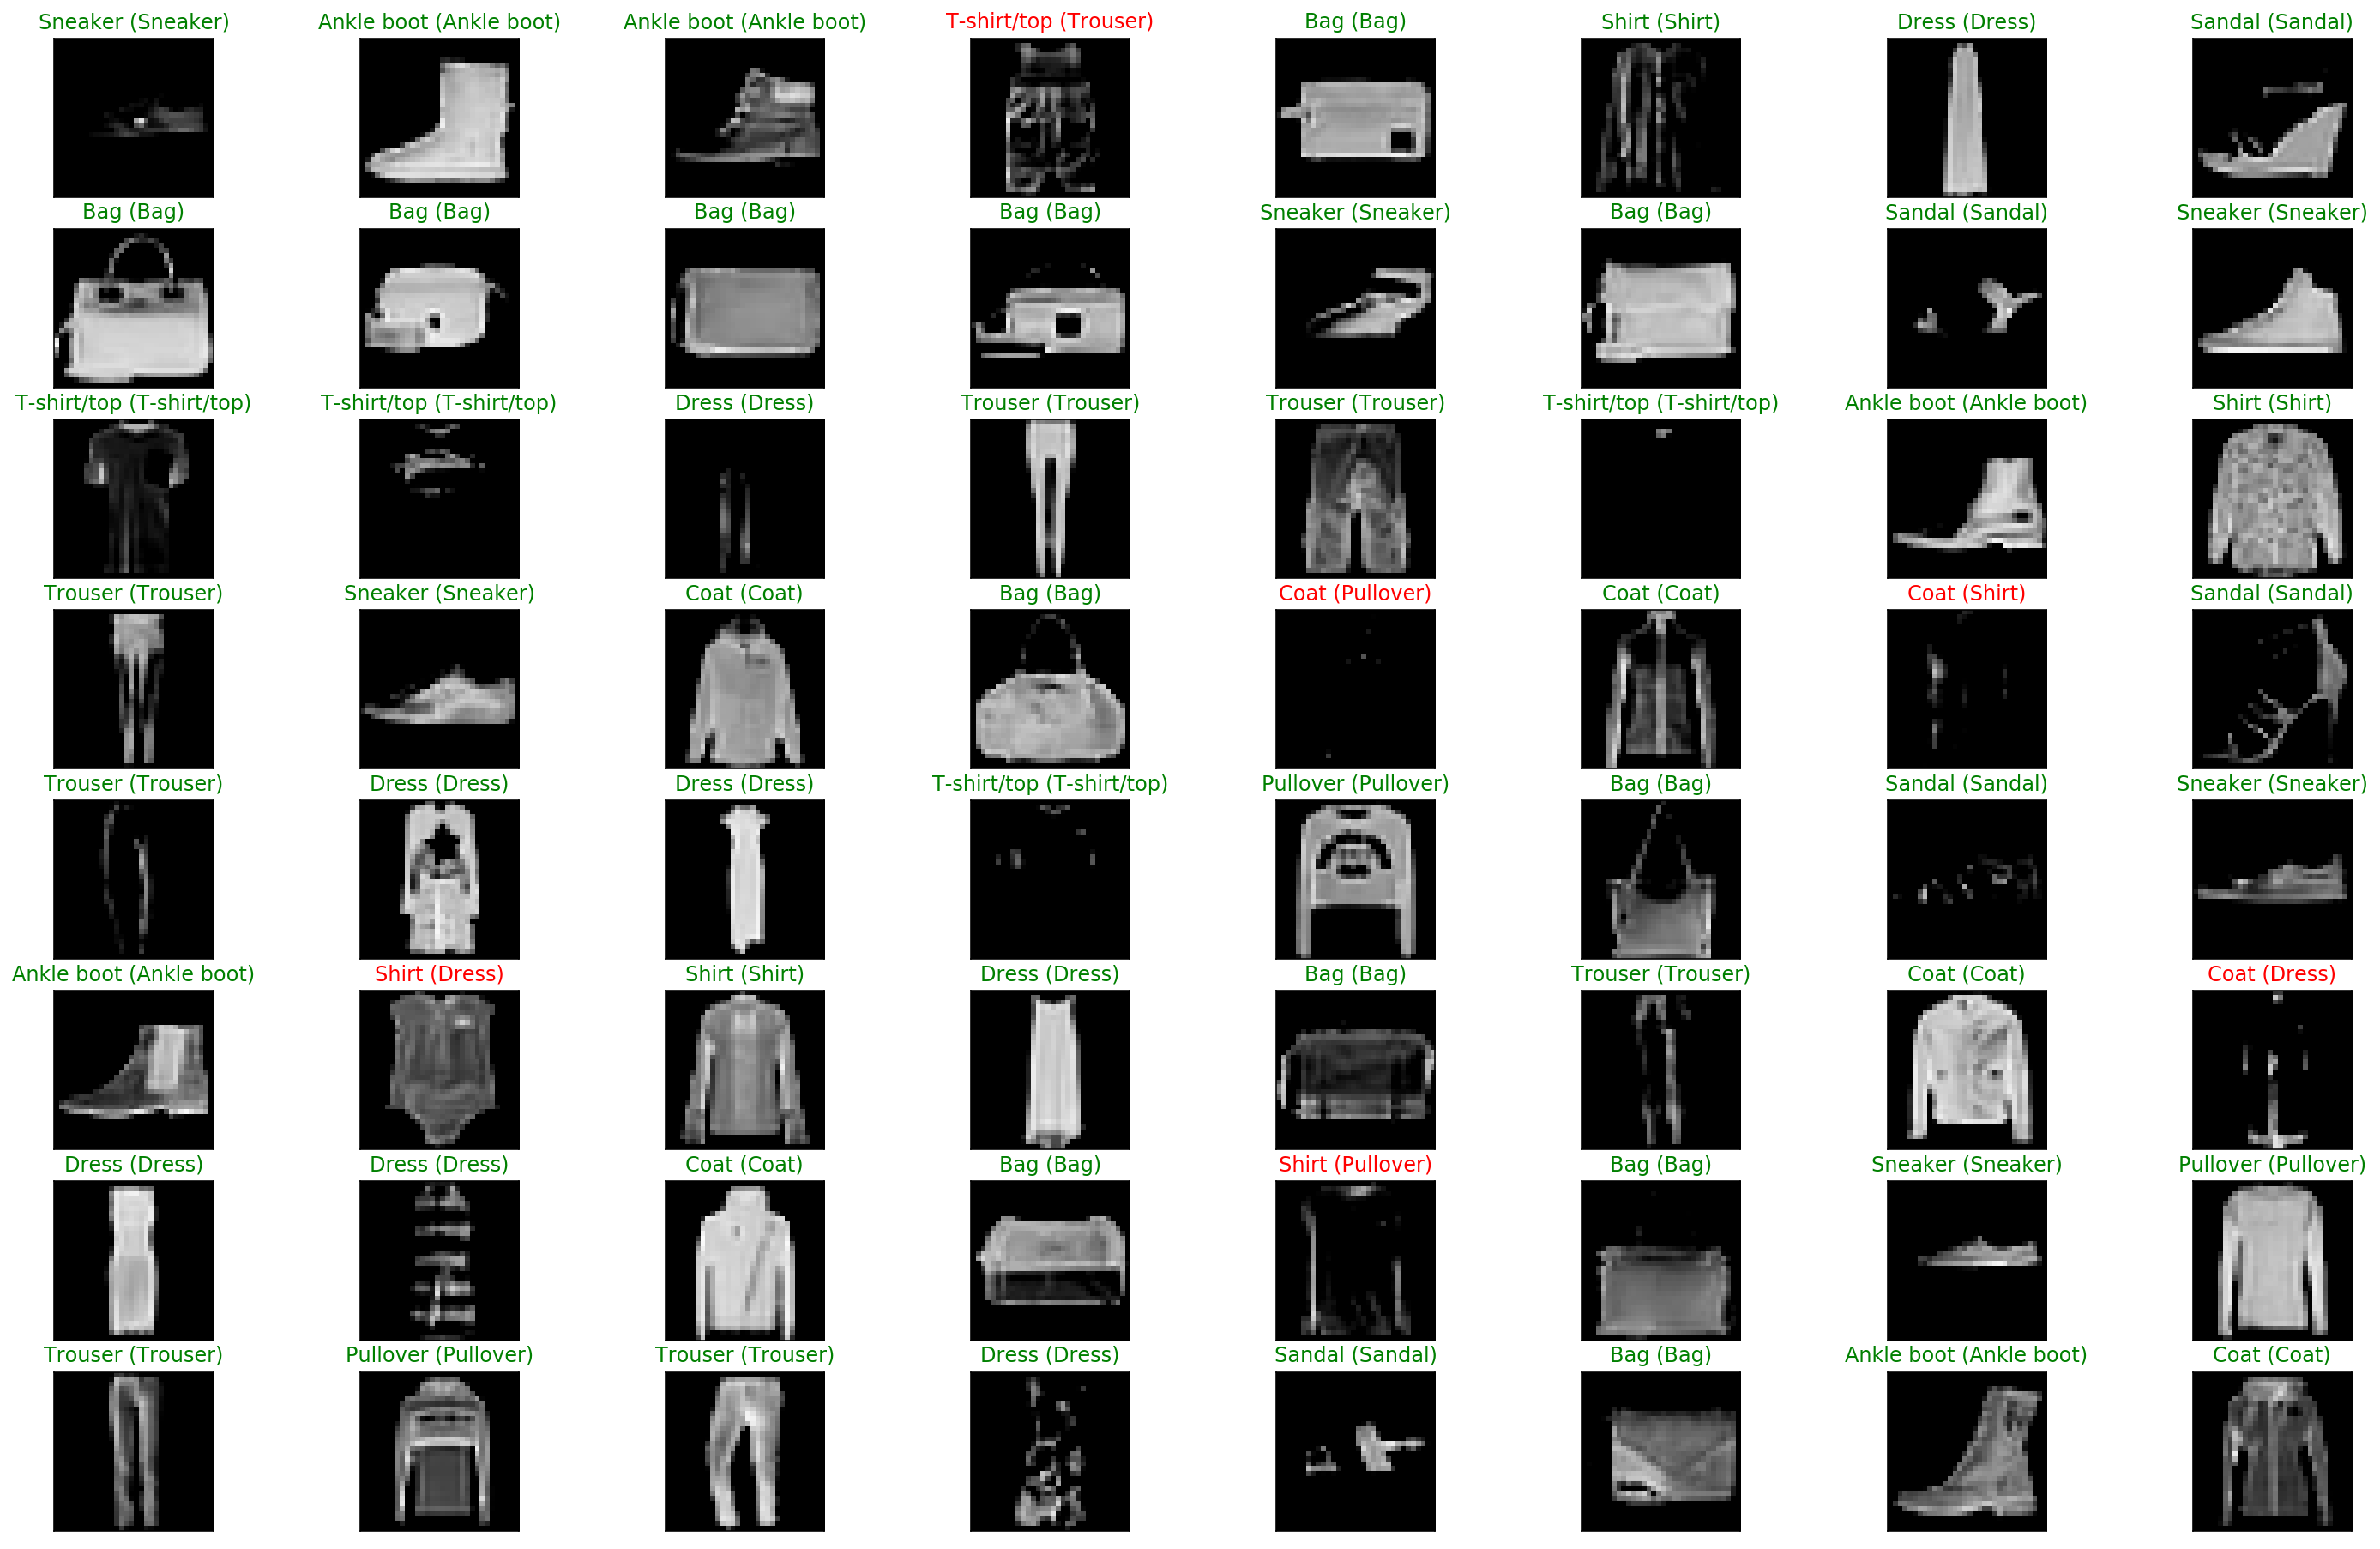

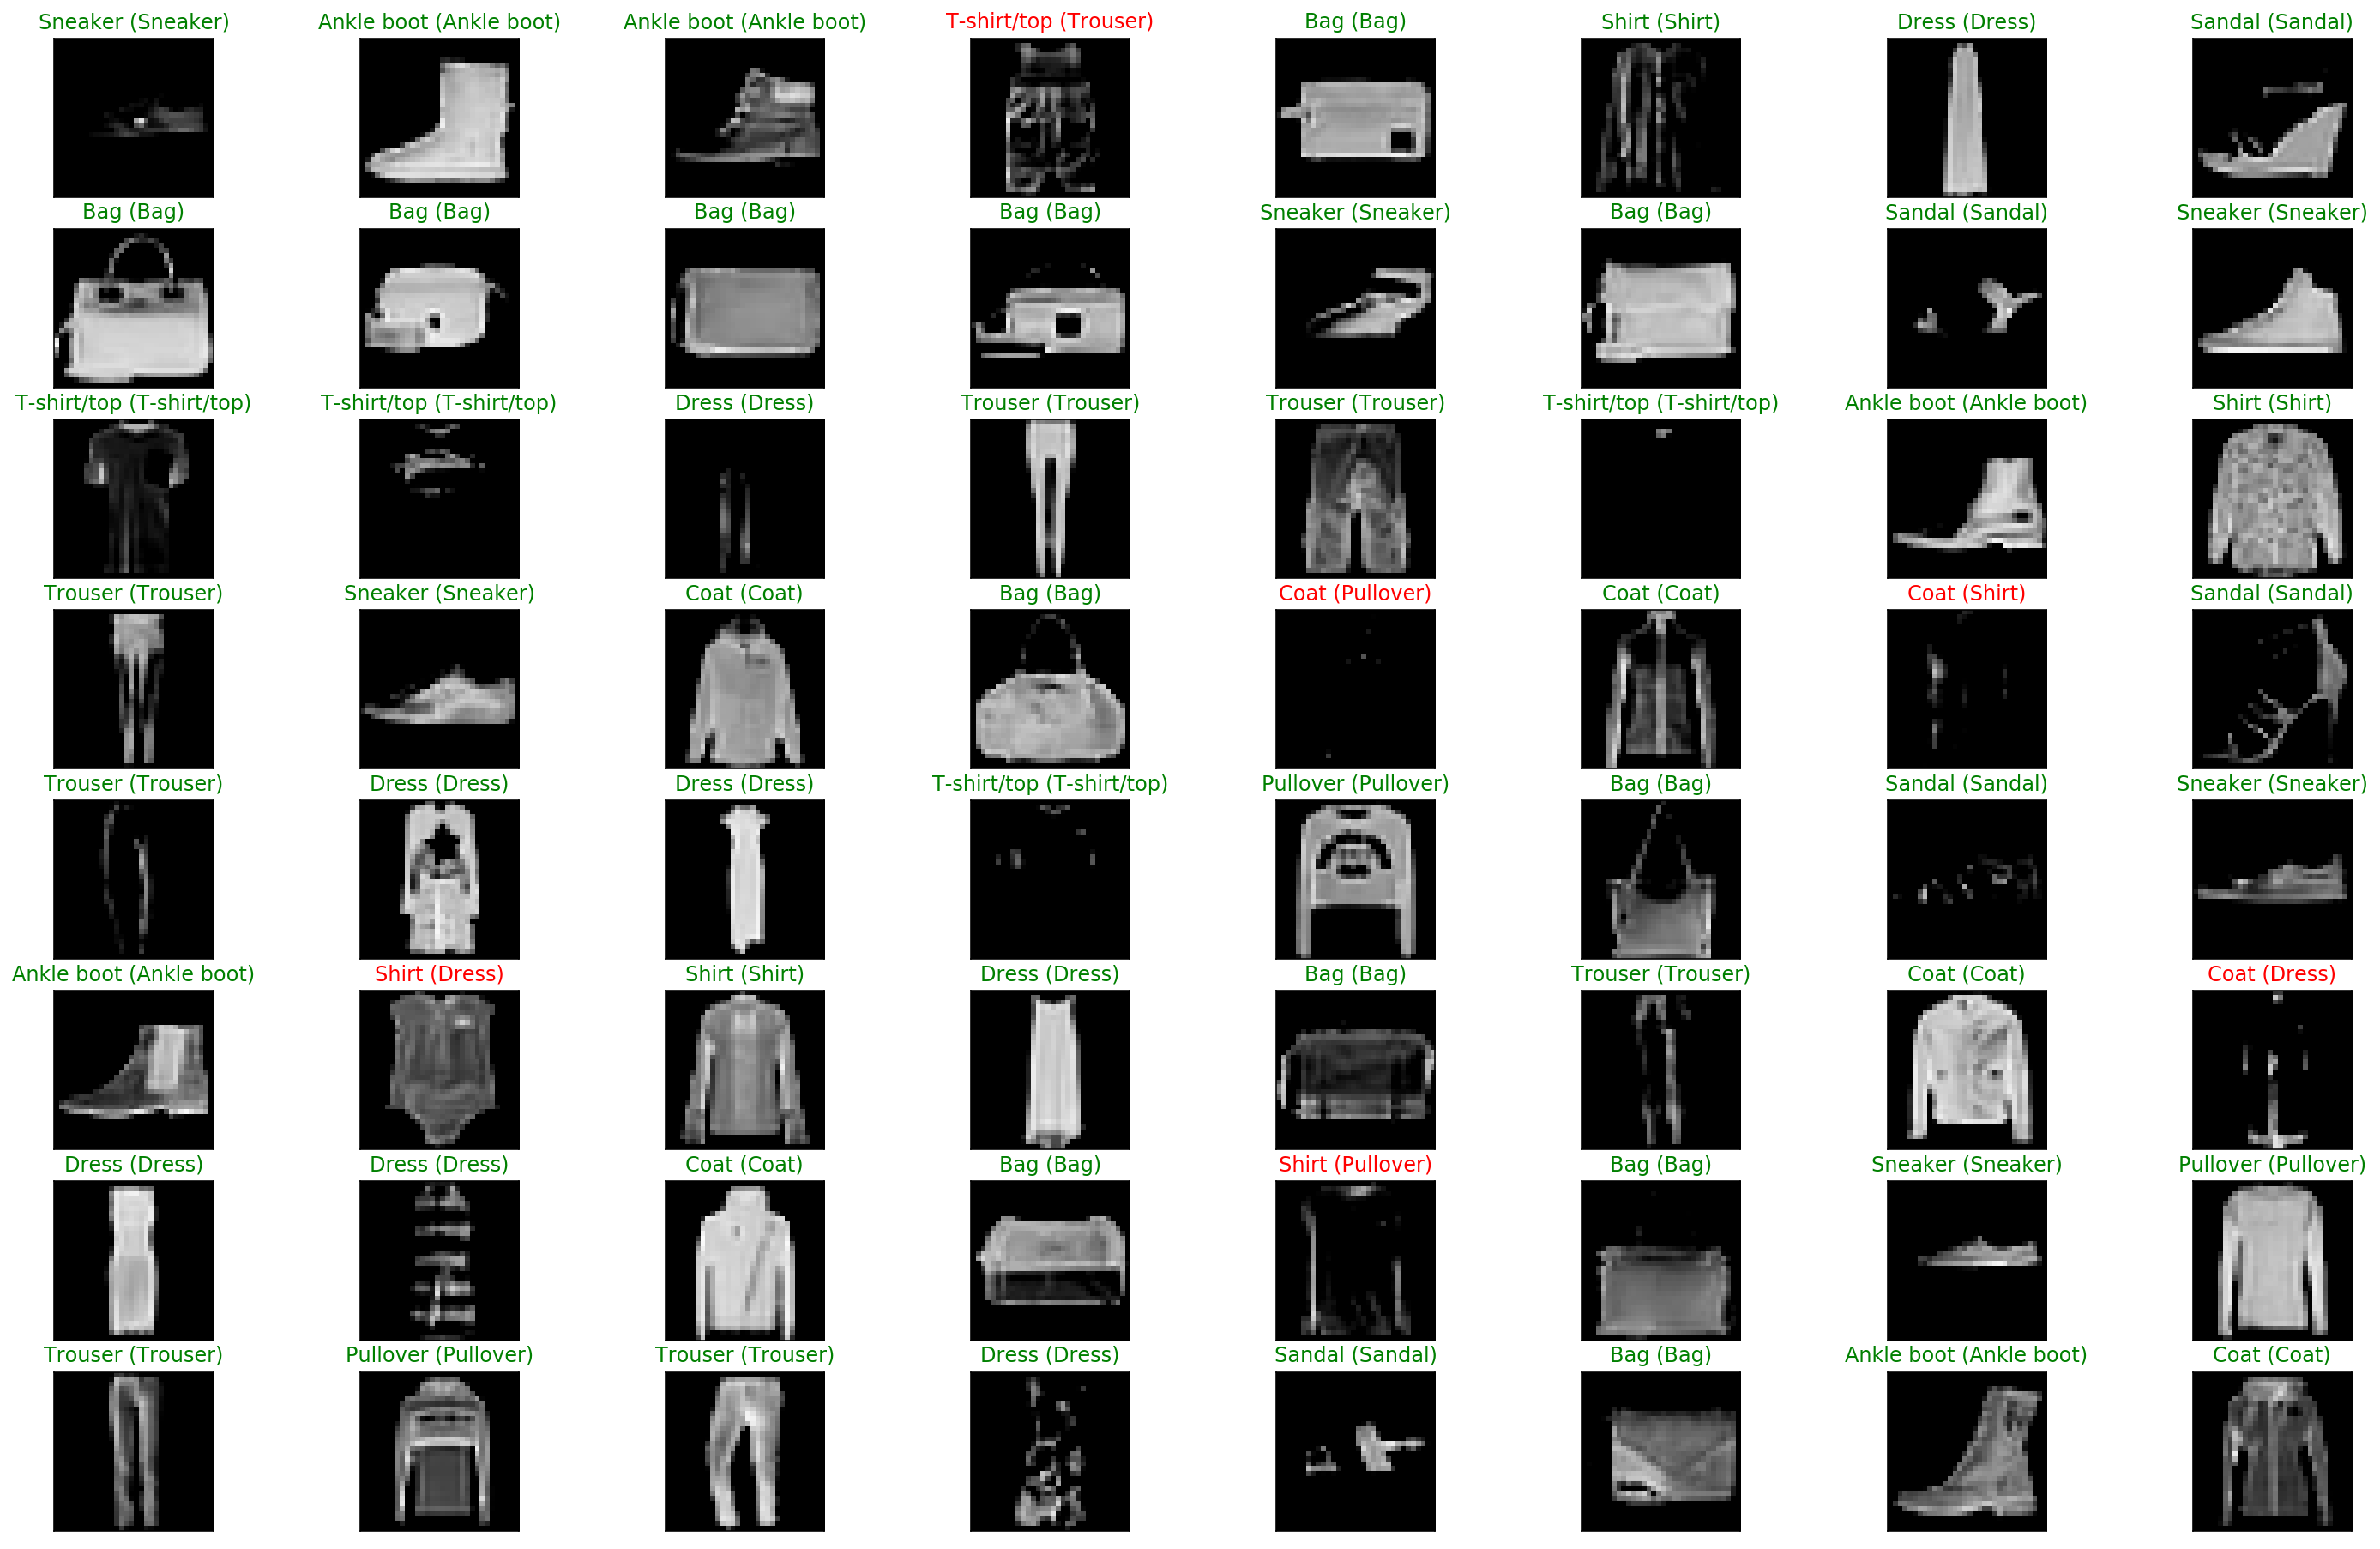

In [23]:
# obtain one batch of test images with its predictions

dataiter = iter(test_loader)
images, labels = dataiter.next()

images = to_3_channels_tensor_batch(images)
# get predictions
print(images.shape)
preds = np.squeeze(net(images).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 16))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(8, batch_size/8, idx+1, xticks=[], yticks=[])
    ax.imshow(np.moveaxis(images[idx], 0, -1))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Exercise: Unfreeze classifier

Does the model improve training all classifier and not just the last layer? What about the time it takes to train?
 

In [24]:
# Freeze all layers

for param in net.parameters():
    param.requires_grad = False

In [25]:
for param in net.classifier.parameters():
    param.requires_grad = True

In [ ]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 1 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/home/ubuntu/.pyenv/versions/3.6.9/envs/learn-pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


Epoch: 1, Batch: 51, Avg. Loss: 0.28423827230930326, Time: 104.90713429450989
Epoch: 1, Batch: 51, Avg. Loss: 0.28423827230930326, Time: 104.90713429450989
Epoch: 1, Batch: 151, Avg. Loss: 0.5686377276480198, Time: 206.65981078147888
Epoch: 1, Batch: 151, Avg. Loss: 0.5686377276480198, Time: 206.65981078147888
Epoch: 1, Batch: 251, Avg. Loss: 0.5103873708844184, Time: 147.97540521621704
Epoch: 1, Batch: 251, Avg. Loss: 0.5103873708844184, Time: 147.97540521621704


# Exercise: Unfreeze all

Does the model improve training all layers and not just the classifier? What about the time it takes to train?
 

In [ ]:
# Unfreeze all layers

for param in net.parameters():
    param.requires_grad = True

In [ ]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 2 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

In [ ]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

# Exercise: Train the model without using pretrained weigths 

In [ ]:
net = models.vgg11(pretrained = False)


In [ ]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 2 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

In [ ]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

In [ ]:
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
n_epochs = 3 # start small to see if your model works, initially

# call train and record the loss over time
training_loss = train(n_epochs)

In [ ]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(tqdm_notebook(test_loader)):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(to_3_channels_tensor_batch(inputs))

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(labels[0]):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(num_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))